# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 3]

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms

df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations

df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv

df6 All transforms are done on the GPU and no transfer on the CPU is done..

Further descriptions are on notion!

Missing:
3) Debug batch data and see where else data might be on the GPU..


What did not work:

- deletion of all non relevant entries in the batch data - apparently they are not the problem..
- 

In [2]:
# location = 'data/2_usage.csv' #df1
# location = 'data/usage_cpu_e3_t25_main.csv' #df2
# location = 'data/usage_e3_t25_gpu_transforms.csv' #df3
# location = 'data/usage_cpu_torch_empty_cuda_e3_t25.csv' #df4
# location = 'data/usage_GPU_transforms_e5_little_cpu_transfer.csv' #df5
# location = 'data/usage_all_on_gpu_e_3.csv' #df6
folder = '../../data/'
experiment = '104_new'
location = f'{folder}/{experiment}_usage.csv'
# location = '/tmp/output/usage.csv'
# location2 = 'data/16_usage.csv'
# location = 'data/17_usage.csv'
df = pd.read_csv(location) 

In [3]:
# print(df.describe())
print(df.describe().loc[["mean","max"],:])
# print(df.describe()[["mean","max"]])

      device  context  gpu util (%)  memory util (%)  total memory (MB)  \
mean     1.0      NaN      0.877656         0.653847            49140.0   
max      1.0      NaN      1.000000         0.970000            49140.0   

      free memory (MB)  used memory (MB)  memory reserved by torch (MB)  \
mean      13817.869183      35322.130817                   31819.288665   
max       47714.000000      47524.000000                   32086.000000   

      cupy memory (MB)  
mean           3.99337  
max          730.00000  


In [4]:
df["time"] = pd.to_datetime(df["time"])

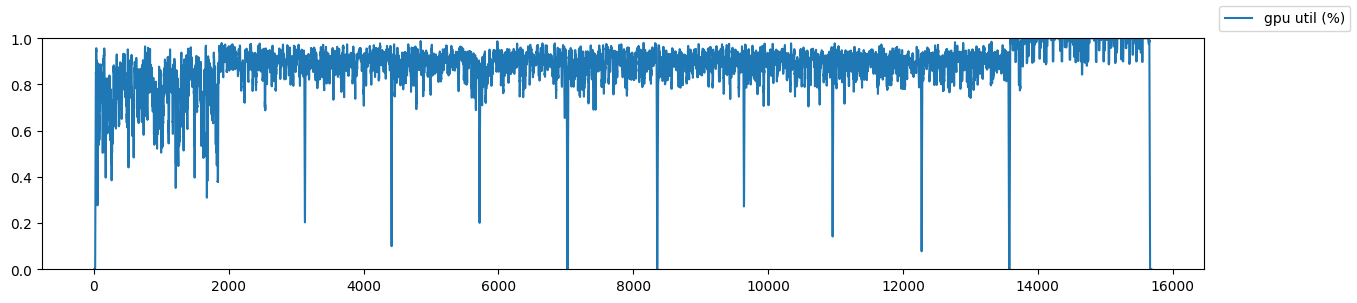

In [5]:
try:
    gpu_util = df.loc[:,"gpu util (%)"].rolling(10).sum()  / 10
    # gpu_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))
    plot, ax = plt.subplots(figsize=(15,3))
    ax.set_ylim((0,1))
    ax.plot(gpu_util, label="gpu util (%)")
    plot.legend()
    plot.savefig(f'{folder}/{experiment}_gpu_util.png')
except KeyError:
    gpu_util = df.loc[:,"utilization"].rolling(10).sum()  / 10
    gpu_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))

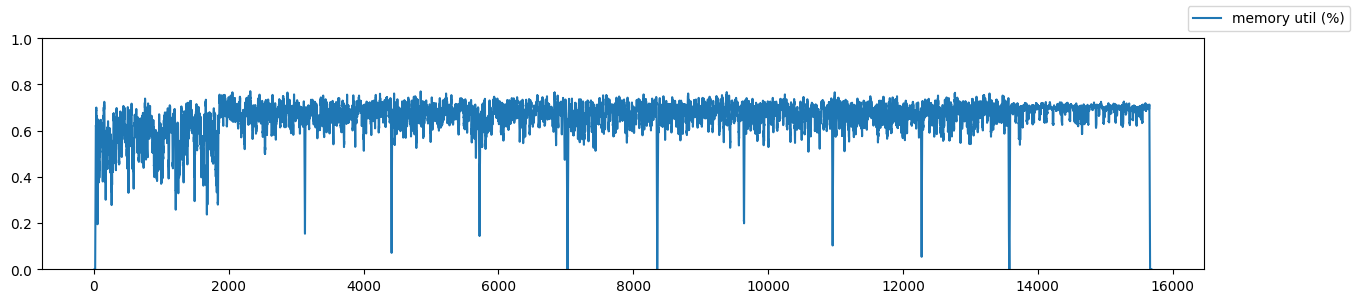

In [6]:
try:
    memory_util = df.loc[:,"memory util (%)"].rolling(10).sum()  / 10
    plot, ax = plt.subplots(figsize=(15,3))
    ax.set_ylim((0,1))
    ax.plot(memory_util, label="memory util (%)")
    plot.legend()
    plot.savefig(f'{folder}/{experiment}_gpu_memory_util.png')
    # memory_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))
except KeyError:
    pass


In [7]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [8]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))
divisor = df.shape[0] / 5
print(divisor)

3137.2


In [9]:
divisor = int(df.shape[0] / 10)
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(divisor).sum()  / divisor

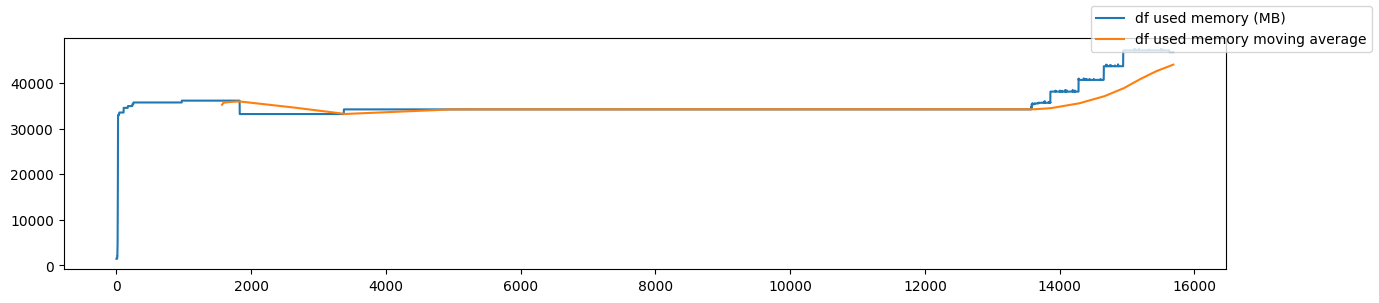

In [10]:
plot, ax = plt.subplots()
from_tick = 0
to_tick = df.shape[0]
for i in ("used memory (MB)","used memory moving average"):
    ax.plot(df.loc[from_tick:to_tick, i], label=f"df {i}")
    # ax.plot(df2.loc[from_tick:to_tick, 'time'], df2.loc[from_tick:to_tick, i], label=f"df2 {i}")
    
plot.legend()
plot.savefig(f'{folder}/{experiment}_gpu_usage.png')

# cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
# ax.xaxis.set_major_formatter(cdf)

In [11]:
df.columns
print(df.shape[0])
print(df.loc[df.shape[0]-1:, 'time'])
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

276537
276536   2023-07-09 19:57:56
Name: time, dtype: datetime64[ns]


In [83]:
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
    # print(df.loc[df.shape[0]-100:, "utilization"])